In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from ndl.nn.conv import ShallowNet
from ndl.utils.plot import plotConfusionMatrix
from ndl.utils.plot import plotClassificationReport
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [4]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [6]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 11s 220us/step - loss: 1.8102 - acc: 0.3676 - val_loss: 1.6948 - val_acc: 0.3956
Epoch 2/40
50000/50000 [==============================] - 9s 179us/step - loss: 1.5373 - acc: 0.4698 - val_loss: 1.4489 - val_acc: 0.4905
Epoch 3/40
50000/50000 [==============================] - 9s 178us/step - loss: 1.3783 - acc: 0.5178 - val_loss: 1.3678 - val_acc: 0.5103
Epoch 4/40
50000/50000 [==============================] - 9s 183us/step - loss: 1.2963 - acc: 0.5465 - val_loss: 1.3161 - val_acc: 0.5289
Epoch 5/40
50000/50000 [==============================] - 9s 183us/step - loss: 1.2440 - acc: 0.5631 - val_loss: 1.3936 - val_acc: 0.5002
Epoch 6/40
50000/50000 [==============================] - 9s 181us/step - loss: 1.2059 - acc: 0.5816 - val_loss: 1.2951 - val_acc: 0.5416
Epoch 7/40
50000/50000 [==============================] - 9s 183us/step - loss: 1.1733 - acc: 

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
print(c_report)

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.56      0.77      0.65      1000
 automobile       0.80      0.67      0.73      1000
       bird       0.58      0.34      0.43      1000
        cat       0.42      0.51      0.46      1000
       deer       0.53      0.61      0.57      1000
        dog       0.58      0.45      0.51      1000
       frog       0.73      0.68      0.71      1000
      horse       0.73      0.61      0.67      1000
       ship       0.73      0.73      0.73      1000
      truck       0.61      0.79      0.68      1000

avg / total       0.63      0.62      0.61     10000



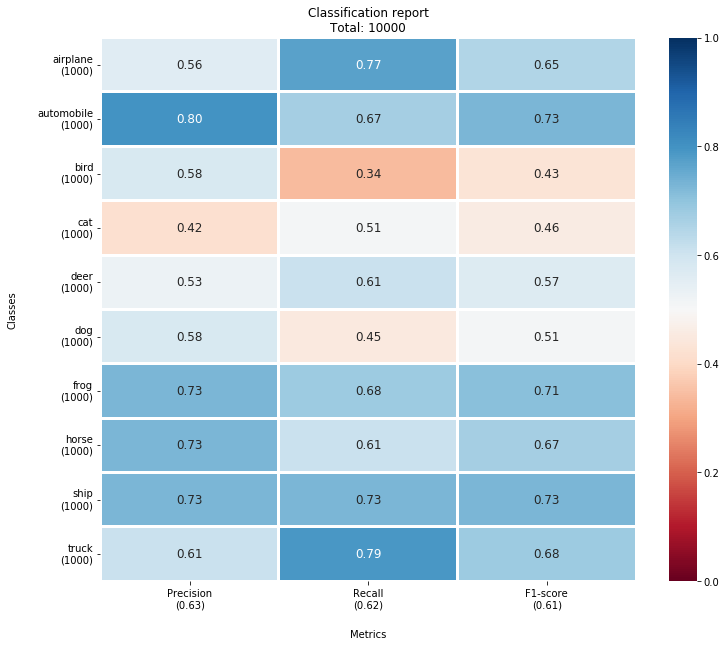

In [8]:
from ndl.utils.plot import plotClassificationReport
plotClassificationReport(c_report)

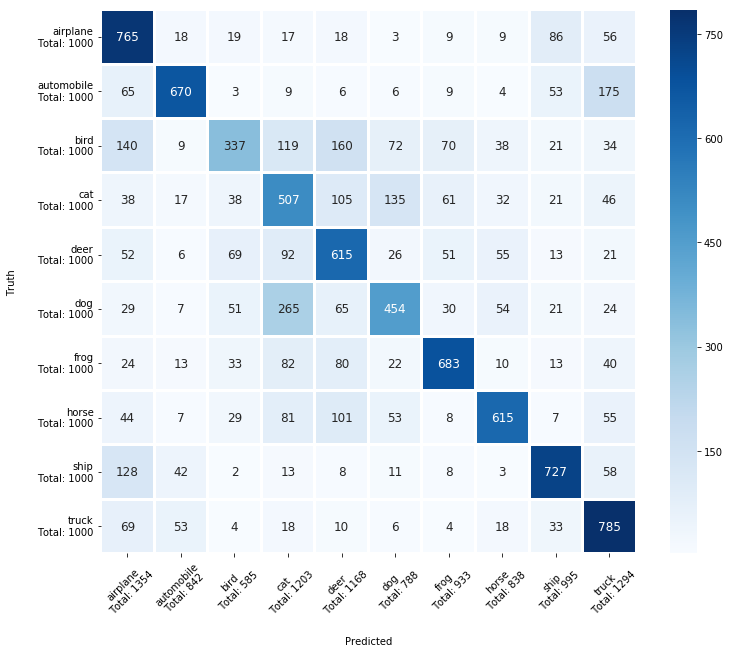

In [9]:
matrix = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plotConfusionMatrix(matrix, labelNames)

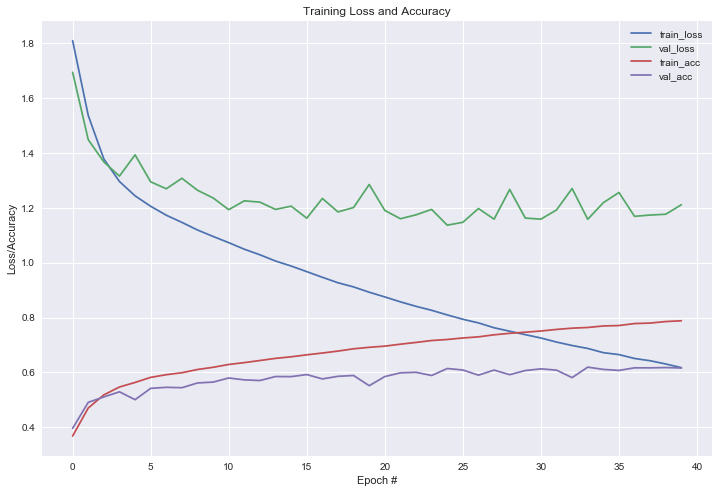

In [10]:
from ndl.utils.plot import plotKerasReport
plotKerasReport(H, 40)

We see some evidance of overfitting but more mild than what we saw on the previous try with CIFAR-10 using our Fully Connected Neural Network. Validation loss diverges after epoch 10 but doesn't skyrocket as in the previous try.

Training time was vastly improved, we got better accuracy and we can improve on this score using regularization.

Overfitting is very easy on the CIFAR-10 as we have a small number of low resolution training samples per class.